# 종합설계 프로젝트
## 올드보이 - 한옥마을 트램 정거장 최적위치 선정 
### process2 우선순위 선정

In [30]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd 
import os
from tqdm.auto import tqdm

In [2]:
df = pd.read_excel('./datalab.xlsx')
df.head()
df.columns
# df = df.loc[:,['날짜','전주 한옥마을','전주 한옥마을 맛집','전주 남부시장']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1957 entries, 0 to 1956
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   날짜         1957 non-null   object 
 1   전주한옥마을     1957 non-null   float64
 2   전주한옥마을 맛집  1957 non-null   float64
 3   전주한옥마을 카페  1957 non-null   float64
 4   전주한옥마을 한복  1957 non-null   float64
dtypes: float64(4), object(1)
memory usage: 76.6+ KB


In [3]:
# 결측치 갯수 확인
from numpy import NaN, NAN, nan
rn = df.shape[0]
rn_m = rn-df.count()
print(rn_m)

날짜           0
전주한옥마을       0
전주한옥마을 맛집    0
전주한옥마을 카페    0
전주한옥마을 한복    0
dtype: int64


In [4]:
df.iloc[:,0] = pd.to_datetime(df['날짜'], format='%Y-%m-%d')

In [5]:
df_d = df.set_index('날짜')
df_m = df_d.resample('M').sum()
df_m.head()

,전주한옥마을,전주한옥마을 맛집,전주한옥마을 카페,전주한옥마을 한복
날짜,,,,
2016-01-31,51.50600,103.94634,143.19093,98.96684
2016-02-29,57.36842,107.76425,143.69813,113.58785
2016-03-31,46.28398,98.47708,139.70193,91.14878
2016-04-30,59.95331,268.72707,149.47978,93.61473
2016-05-31,57.05939,153.28279,146.72965,92.42989


In [6]:
df_m = df_d.resample('M').sum()
df_m.head()

,전주한옥마을,전주한옥마을 맛집,전주한옥마을 카페,전주한옥마을 한복
날짜,,,,
2016-01-31,51.50600,103.94634,143.19093,98.96684
2016-02-29,57.36842,107.76425,143.69813,113.58785
2016-03-31,46.28398,98.47708,139.70193,91.14878
2016-04-30,59.95331,268.72707,149.47978,93.61473
2016-05-31,57.05939,153.28279,146.72965,92.42989


<IPython.core.display.Javascript object>


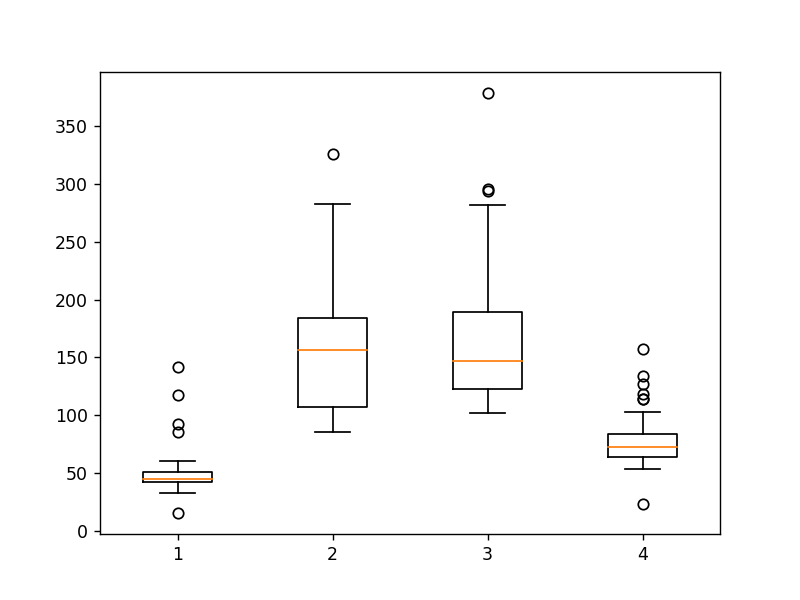

None


In [7]:
fig, bp = plt.subplots()
bp.boxplot([df_m.iloc[:,0], df_m.iloc[:,1],df_m.iloc[:,2],df_m.iloc[:,3]])
print(plt.show()) # normalization 필요함

In [32]:
# # normalization
# from sklearn.preprocessing import MinMaxScaler

# for i in range(0,3):
#     df_m.iloc[:,i] = df_m.iloc[:,i].astype(float)

# ss=MinMaxScaler()
# re = ss.fit_transform(df_m.iloc[:,0:3])

# for i in range(0,3):
#     df_m[i+3] = [x[i] for x in re]

In [11]:
df_m.head()

,전주한옥마을,전주한옥마을 맛집,전주한옥마을 카페,전주한옥마을 한복
날짜,,,,
2016-01-31,51.50600,103.94634,143.19093,98.96684
2016-02-29,57.36842,107.76425,143.69813,113.58785
2016-03-31,46.28398,98.47708,139.70193,91.14878
2016-04-30,59.95331,268.72707,149.47978,93.61473
2016-05-31,57.05939,153.28279,146.72965,92.42989


In [8]:
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

<IPython.core.display.Javascript object>


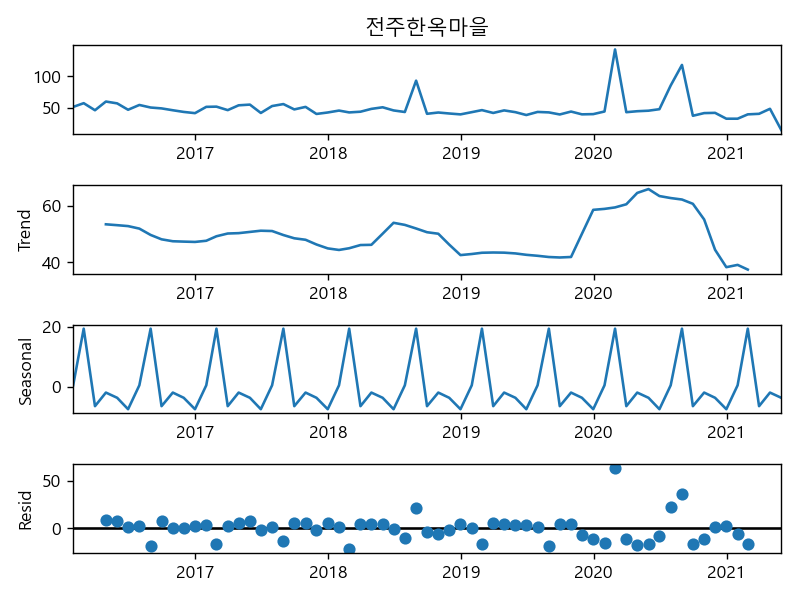

None


<IPython.core.display.Javascript object>


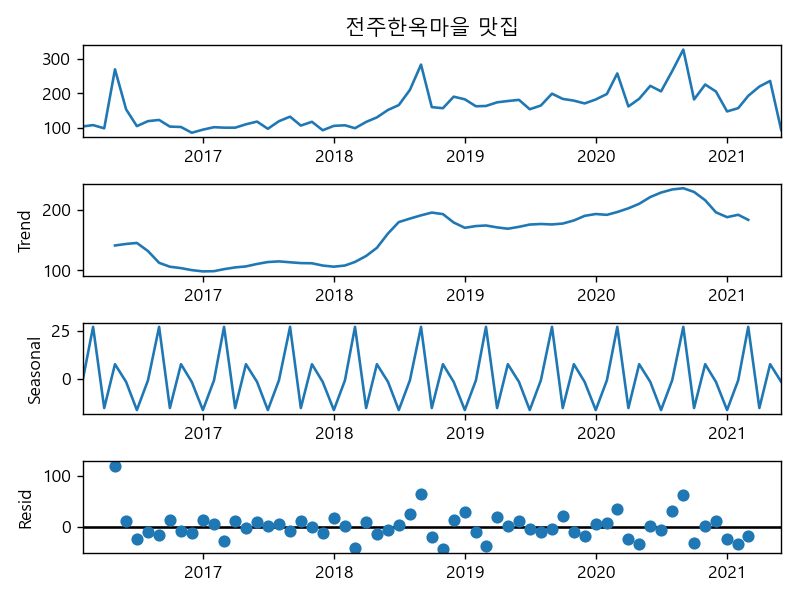

None


<IPython.core.display.Javascript object>


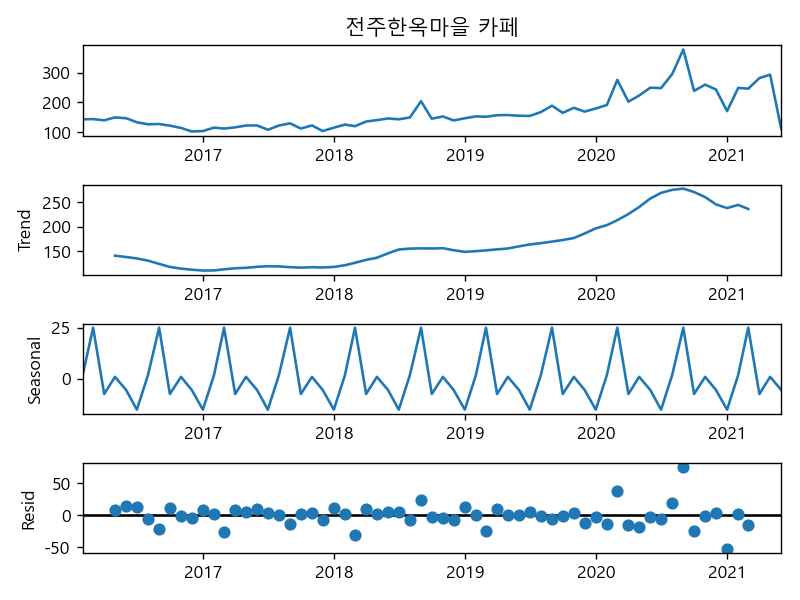

None


<IPython.core.display.Javascript object>


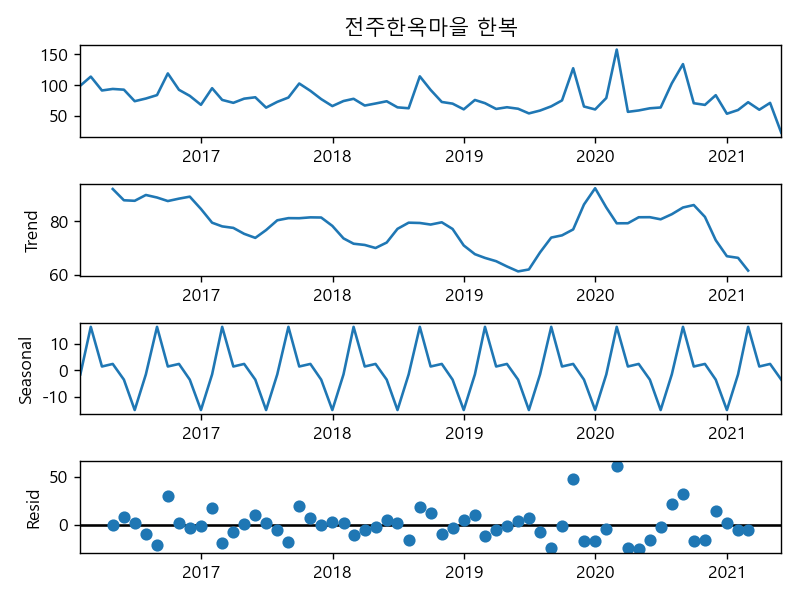

None


In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

for i in range(len(df_m.columns)):
    seasonal_decompose(df_m.iloc[:,i],model='additive',period=6).plot()
    print(plt.show())

In [10]:
# 데이터 셋 분할(시간순서로 된 데이터로 무작위 추출은 안됨)
# 예측의 MSE를 파악하기 위함임
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df_m, test_size=0.3, shuffle=False)
print(df_train.shape)
print(df_test.shape)

(45, 4)
(20, 4)


In [11]:
# moving average
import numpy as np

# moving average 
mv_1 = df_train.iloc[:,0].rolling(3).mean()
mv_2 = df_train.iloc[:,1].rolling(3).mean()
mv_3 = df_train.iloc[:,2].rolling(3).mean()
mv_4 = df_train.iloc[:,3].rolling(3).mean()

# exponential moving average
ema_1 = df_train.iloc[:,0].ewm(3).mean()
ema_2 = df_train.iloc[:,1].ewm(3).mean()
ema_3 = df_train.iloc[:,2].ewm(3).mean()
ema_4 = df_train.iloc[:,3].ewm(3).mean()

# weighted moving average 
def wma(ary): 
    def inner(x):
        return (ary*x).mean()
    return inner 

weight = np.arange(1,4)
wma_1 = df_train.iloc[:,0].rolling(3).apply(lambda pre: np.dot(pre, weight)/weight.sum(),
                                      raw=True)
wma_2 = df_train.iloc[:,1].rolling(3).apply(lambda pre: np.dot(pre, weight)/weight.sum(),
                                      raw=True)
wma_3 = df_train.iloc[:,2].rolling(3).apply(lambda pre: np.dot(pre, weight)/weight.sum(),
                                      raw=True)
wma_4 = df_train.iloc[:,3].rolling(3).apply(lambda pre: np.dot(pre, weight)/weight.sum(),
                                      raw=True)

In [12]:
mv_d = {
    'mv_1':mv_1,
    'mv_2':mv_2,
    'mv_3':mv_3,
    'mv_4':mv_4,
    'ema_1':ema_1,
    'ema_2':ema_2,
    'ema_3':ema_3,
    'ema_4':ema_4,
    'wma_1':wma_1,
    'wma_2':wma_2,
    'wma_3':wma_3,
    'wma_4':wma_4
}
mv_df = pd.DataFrame(mv_d)
mv_df.head()

,mv_1,mv_2,mv_3,mv_4,ema_1,ema_2,ema_3,ema_4,wma_1,wma_2,wma_3,wma_4
날짜,,,,,,,,,,,,
2016-01-31,NaN,NaN,NaN,NaN,51.506000,103.946340,143.190930,98.966840,NaN,NaN,NaN,NaN
2016-02-29,NaN,NaN,NaN,NaN,54.855954,106.128003,143.480759,107.321703,NaN,NaN,NaN,NaN
2016-03-31,51.719467,103.395890,142.196997,101.234490,51.149155,102.819496,141.846671,100.328006,50.849130,102.484347,141.615497,99.931480
2016-04-30,54.535237,158.322800,144.293280,99.450453,54.368960,163.494266,144.638208,97.872865,54.966052,185.149937,145.256888,96.121600
2016-05-31,54.432227,173.495647,145.303787,92.397800,55.250842,160.147098,145.323751,96.088740,56.228128,182.629932,146.475073,92.611318


In [13]:
df_m.columns

Index(['전주한옥마을', '전주한옥마을 맛집', '전주한옥마을 카페', '전주한옥마을 한복'], dtype='object')

<IPython.core.display.Javascript object>


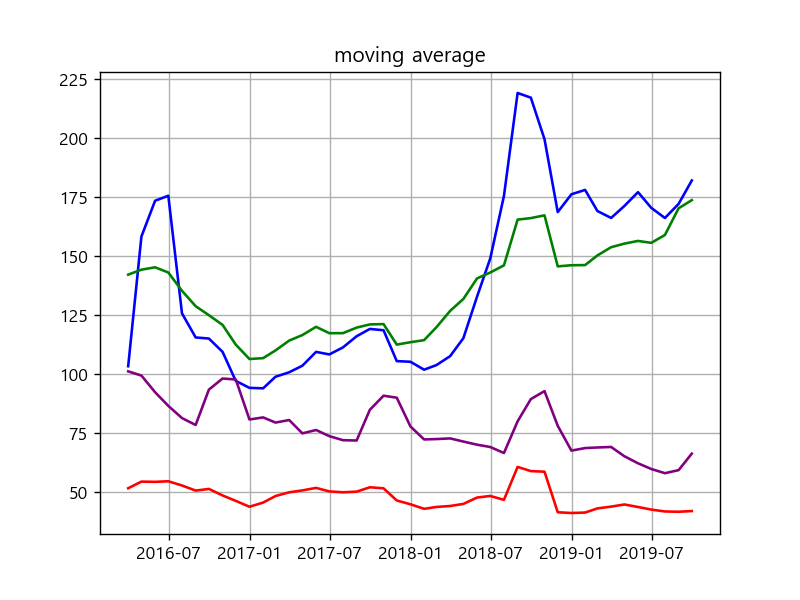

None


In [14]:
colors = ['red','blue','green','purple']
labels = ['전주한옥마을', '전주한옥마을 맛집', '전주한옥마을 카페', '전주한옥마을 한복']
mv_s = mv_df.iloc[:,0:4]
plt.figure()
plt.title('moving average')
for i in range(0,4):
    plt.plot(mv_s.iloc[:,i], color=colors[i])
    
plt.grid()
print(plt.show())

In [15]:
colors = ['red','blue','green','purple']
labels = ['전주한옥마을', '전주한옥마을 맛집', '전주한옥마을 카페', '전주한옥마을 한복']
mv_s = mv_df.iloc[:,4:8]
plt.figure()
plt.title('exponential moving average')
for i in range(0,4):
    plt.plot(mv_s.iloc[:,i], color=colors[i])
    
plt.grid()
print(plt.show())

<IPython.core.display.Javascript object>

None


In [16]:
colors = ['red','blue','green','purple']
labels = ['전주한옥마을', '전주한옥마을 맛집', '전주한옥마을 카페', '전주한옥마을 한복']
mv_s = mv_df.iloc[:,8:12]
plt.figure()
plt.title('weighted moving average')
for i in range(0,4):
    plt.plot(mv_s.iloc[:,i], color=colors[i])
    
plt.grid()
print(plt.show())

<IPython.core.display.Javascript object>

None


In [39]:
df_train.head()

,전주한옥마을,전주한옥마을 맛집,전주한옥마을 카페,전주한옥마을 한복
날짜,,,,
2016-01-31,51.50600,103.94634,143.19093,98.96684
2016-02-29,57.36842,107.76425,143.69813,113.58785
2016-03-31,46.28398,98.47708,139.70193,91.14878
2016-04-30,59.95331,268.72707,149.47978,93.61473
2016-05-31,57.05939,153.28279,146.72965,92.42989


In [17]:
# simple exponential smoothing
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing


exp_1 = SimpleExpSmoothing(df_train.iloc[:,0], 
                           initialization_method='estimated').fit()
exp_1_foc = exp_1.forecast(20).rename(r'$\alpha%s$'%exp_1.model.params['smoothing_level'])

exp_2 = SimpleExpSmoothing(df_train.iloc[:,1], 
                           initialization_method='estimated').fit()
exp_2_foc = exp_2.forecast(20).rename(r'$\alpha=%s$'%exp_2.model.params['smoothing_level'])

exp_3 = SimpleExpSmoothing(df_train.iloc[:,2], 
                           initialization_method='estimated').fit()
exp_3_foc = exp_3.forecast(20).rename(r'$\alpha=%s$'%exp_3.model.params['smoothing_level'])
exp_4 = SimpleExpSmoothing(df_train.iloc[:,3], 
                           initialization_method='estimated').fit()
exp_4_foc = exp_4.forecast(20).rename(r'$\alpha=%s$'%exp_3.model.params['smoothing_level'])

<IPython.core.display.Javascript object>


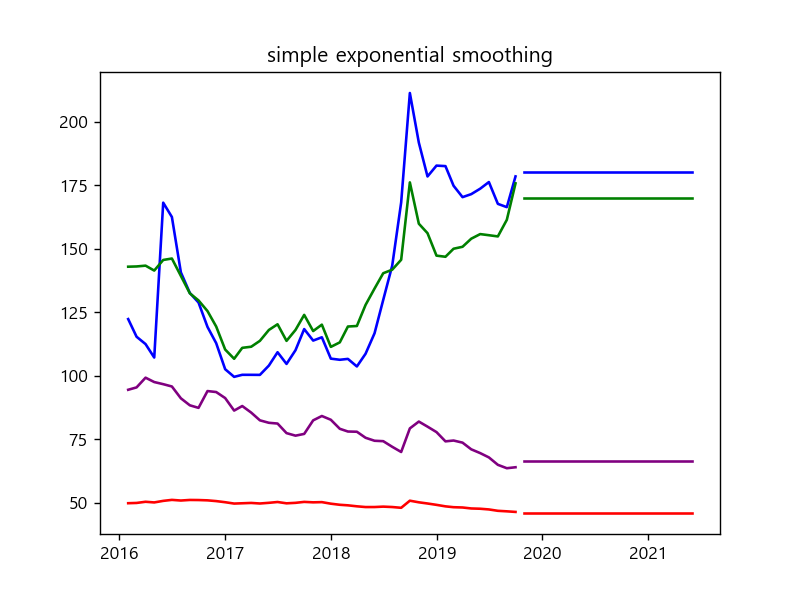

None
None
None
None


In [18]:
labels = ['전주한옥마을', '전주한옥마을 맛집', '전주한옥마을 카페', '전주한옥마을 한복']
exp_d = [exp_1, exp_2, exp_3,exp_4]
exp_c = [exp_1_foc,exp_2_foc,exp_3_foc,exp_4_foc]
colors = ['red','blue','green','purple']
plt.figure()
plt.title('simple exponential smoothing')
for i in range(len(df_train.columns)):
    plt.plot(exp_d[i].fittedvalues,color=colors[i])
    lines = plt.plot(exp_c[i],color=colors[i])
    print(plt.show())

In [19]:
from dateutil.relativedelta import relativedelta
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
import statsmodels.api as sm
from itertools import product
import warnings

In [20]:
# grid search
p=d=q=range(0,3)
pdq = list(product(p,d,q))
seasonal_pdq = [(x[0],x[1],x[2],12) for x in pdq]
    
warnings.filterwarnings("ignore")
# select_candi = 10000000
# param_candi = (0, 0, 0)
# param_seasonal_candi = (0, 0, 0)
    
def grid(s):
    select_candi = 10000000
    param_candi = (0, 0, 0)
    param_seasonal_candi = (0, 0, 0)
    count=0
    end_count = len(pdq)
    
    for param in pdq:   
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(s,
                                                order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False
                                               )
                results = mod.fit()
                count += 1
                if count <= 4:
                    print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))

                if results.aic < select_candi:
                    select_candi = results.aic
                    param_candi = param
                    param_seasonal_candi = param_seasonal
            except:
                continue
    return param_candi, param_seasonal_candi, select_candi  

In [21]:
pdq = list(product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2)]

In [22]:
df_train.columns

Index(['전주한옥마을', '전주한옥마을 맛집', '전주한옥마을 카페', '전주한옥마을 한복'], dtype='object')

In [23]:
print("전주한옥마을{}".format(grid(df_train.iloc[:,0])))
print("전주한옥마을 맛집{}".format(grid(df_train.iloc[:,1])))
print("전주한옥마을 카페{}".format(grid(df_train.iloc[:,2])))
print("전주한옥마을 한복{}".format(grid(df_train.iloc[:,3])))

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:468.9076550530629
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1401.99087438237
ARIMA(0, 0, 0)x(0, 0, 2, 12)12 - AIC:205.20039069497926
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:251.45780418213934
전주한옥마을((0, 2, 2), (2, 1, 2, 12), -5.786777619556325)
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:566.129986927867
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1504.788876040606
ARIMA(0, 0, 0)x(0, 0, 2, 12)12 - AIC:256.4842617401306
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:352.5237803174688
전주한옥마을 맛집((0, 0, 0), (0, 2, 2, 12), 6.0)
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:560.5784582234771
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1506.869395144945
ARIMA(0, 0, 0)x(0, 0, 2, 12)12 - AIC:250.50866750001336
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:300.2206597455764
전주한옥마을 카페((0, 2, 2), (1, 1, 2, 12), -16.351125973477206)
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:511.64151732303293
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1383.3936086322665
ARIMA(0, 0, 0)x(0, 0, 2, 12)12 - AIC:221.01352822570234
ARIMA(0, 0, 0)x(0, 1

In [55]:
mod_0 = sm.tsa.statespace.SARIMAX(
        df_train.iloc[:,0],
        order=(0,2,2),
        seasonal_order=(2,1,2,12),
#         enforce_stationarity=False,
        enforce_invertibility=False)
results_0 = mod_0.fit()

mod_1 = sm.tsa.statespace.SARIMAX(
        df_train.iloc[:,1],
        order=(0,0,0),
        seasonal_order=(0,2,2,12),
#         enforce_stationarity=False,
        enforce_invertibility=False)
results_1 = mod_1.fit()

mod_2 = sm.tsa.statespace.SARIMAX(
        df_train.iloc[:,2],
        order=(0,2,2),
        seasonal_order=(1,1,2,12),
#         enforce_stationarity=False,
        enforce_invertibility=False)
results_2 = mod_2.fit()

mod_3 = sm.tsa.statespace.SARIMAX(
        df_train.iloc[:,3],
        order=(1,1,2),
        seasonal_order=(1,1,2,12),
#         enforce_stationarity=False,
        enforce_invertibility=False)
results_3 = mod_3.fit()

In [35]:
re_l = [results_0,results_1,results_2,results_3]
labels = ['전주한옥마을', '전주한옥마을 맛집', '전주한옥마을 카페', '전주한옥마을 한복']

for i in range(len(re_l)):
    print('{}\n{}'.format(labels[i],re_l[i].summary().tables[1]))

전주한옥마을
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.8208      2.763     -0.659      0.510      -7.236       3.595
ma.L2          0.8555      2.286      0.374      0.708      -3.625       5.336
ar.S.L12      -0.8095    918.840     -0.001      0.999   -1801.703    1800.084
ar.S.L24      -0.9413    852.106     -0.001      0.999   -1671.038    1669.155
ma.S.L12      -0.9925    1.7e+04  -5.84e-05      1.000   -3.33e+04    3.33e+04
ma.S.L24       0.6724   6.39e+04   1.05e-05      1.000   -1.25e+05    1.25e+05
sigma2         4.6535   1.85e+05   2.51e-05      1.000   -3.63e+05    3.63e+05
전주한옥마을 맛집
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12      -1.1387      0.358     -3.178      0.001      -1.841      -0.436
ma.S.L24       0.1379      0.420   

In [57]:
# for i in range(len(re_l)):
#     re_l[i].plot_diagnostics(lags=4,figsize=(30,15))
#     print(plt.show())